# WeRateDOgs: Twitter Data Analysis
- in this analysis the following will be addressed 
>1. Gathering data
>2. Assessing data
>3. Cleaning data
>4. Storing data
>5. Analyzing and Visualization
>6. Reporting

# Step 1: Gathering Data
In this section three different data are collected.
-  `twitter-archive-enhanced.csv`, given file
-  `image-predictions.tsv`, downloaded from this [link url](https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv)
- `tweet-json.txt`, is collected using weepy API based on the ID from the `twitter-archive-enhanced.csv`

**All requiered activities and processes are incorporated and followed to have the datasets** 


In [1]:
# importing all the requiered library 
import requests
import tweepy
import re
import json
import pandas as pd
from textblob import TextBlob
import zipfile
from tweepy import OAuthHandler
from timeit import default_timer as timer
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
import seaborn as sns
import numpy as np

### 1. Gathering twitter archive enhanced datasets
- the data is already given 

In [2]:
# creating archive dataframe
archive_df = pd.read_csv('datasets/twitter-archive-enhanced.csv')

In [3]:
# checking 
archive_df.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [3]:
print(archive_df.text.head(1))

0    This is Phineas. He's a mystical boy. Only eve...
Name: text, dtype: object


In [5]:
#checkiing info
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

### 2. Gathering image-predictions file
- The URL to the file is available 
- Downloading and writting using the request library

In [2]:
# requesting the url
# downloading using the file programatically 
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

In [3]:
# checking the Url is reachable 
response

<Response [200]>

In [16]:
# Writting to the file 
with open(url.split('/')[-1], mode = 'wb') as file:
    file.write(response.content)

In [4]:
# loading the file to the dataframe and checking
image_df = pd.read_csv('Datasets/image-predictions.tsv', sep ='\t')
image_df.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


In [8]:
image_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   float64
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(4), int64(1), object(4)
memory usage: 152.1+ KB


### 3. Data gathering from twitter using API
- the code for gthering form twiiter API is given below.
- for this project I used the given tweet_json.txt and read the required fields line by line
- the given code below is helps to fathere the required information from the twitter using twitter api

In [ ]:
# importing twitter api and other reqired library
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

# authontication with given keys
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

# creating api object 
api = tweepy.API(auth, wait_on_rate_limit=True)
# the tweet_id from the twitter-archive-enhenced dataset
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# open and save each tweet's returned JSON as a new line in a tweet_json.txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

#### Gthering the data from the given tweet_json.txt file

In [5]:
# reading the requiered information from the tweet-json.txt file
# Save only the required elements in the DataFrame
elements_to_save = ['id', 'favorite_count', 'retweet_count']
# Later convert list to dataframe
data = []

with open('datasets/tweet_json.txt', 'r') as readfile: 
    # Read in JSONline and convert to dict
    tweet_json = readfile.readline()
    # Read line by line into DataFrame
    while tweet_json:
        tweet_dict = json.loads(tweet_json)
        # Create a smaller dict
        data_row = dict((k, tweet_dict[k]) for k in elements_to_save)
        data.append(data_row)

        # Read in JSON line and convert to dict
        tweet_json = readfile.readline()

    tweet_df = pd.DataFrame.from_dict(data)
    print (" the required fields are gathered successfully ")

 the required fields are gathered successfully 


In [6]:
# reading to dataframe
tweet_df.head()

,id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


In [13]:
# using head 
tweet_df.shape

(2354, 3)

In [16]:
# checking information
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   favorite_count  2354 non-null   int64
 2   retweet_count   2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


### All the three requierd files are collected! 

# Step 2: Assessing Data
Assessing data is the second step in the data wrangling process. The data is assessed and inspected for two purpose:
 - **Data quality issues**: Data that has quality issues have issues with content like missing, duplicate, or incorrect data. This is called dirty data.
 - **Tidiness issues**: Data that has specific structural issues that slows down when cleaning and analyzing, visualizing, or modeling your data later.

These issues can be handled in two ways:
- Visually by scrolling, the excel file
- Programmatically using code

##  Assessing Visually
Using scrolling and observing, the following are identified
- Quality issues
 >- twitter-archive-enhanced table - missing value in reply_to_status_id
 >- twitter-archive-enhanced table - missing value in reply_to_user_id
 >- twitter-archive-enhanced table - missing value in retweeted_status_id 
 >- twitter-archive-enhanced table - misiing value in retweeted_status_id 
 >- twitter-archive-enhanced table - the source value is invalid
 >- twitter-archive-enhanced table - the text value is invalid

#### From the above the following are recorded as quqlity issue

Quality
>**Twitter-archive-enhanced table**
- missing value in reply_to_status_id
- missing value in reply_to_user_id
- missing value in retweeted_status_id 
- misiing value in retweeted_status_id 
- the source invalid value
- the text invalid value
>**tweet_df table**
- two missing records 

#### Identified Issues
1. The text is okay but, it is not valid **validity** issue. the text contains number and link
2. Missing records in the image-predictions table, 2075 instead of 2356. This is pretty straightforward, this is a **completeness** issue. We don't have all the records that we need.
3. Missing values 
4. source is not accurate
5. column renaming 

### Programmatic Assessment 
Uses different programs to assess the datasets, some of the methods are:
- #### These are the programmatic assessment methods in pandas that probably applied:
> - .head (DataFrame and Series)
> - .tail (DataFrame and Series)
> - .sample (DataFrame and Series)
> - .info (DataFrame only)
> - .describe (DataFrame and Series)
> - .value_counts (Series only)
> - Various methods of indexing and selecting data (.loc and bracket notation with/without boolean indexing, also .iloc)

### Progrmatic Assessment: twitter-archive-enhanced table

In [9]:
# checking information
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [18]:
# statistical information for numeric values
archive_df.describe().T

,count,mean,std,min,25%,50%,75%,max
tweet_id,2356.0,7.427716e+17,6.856705e+16,6.660209e+17,6.783989e+17,7.196279e+17,7.993373e+17,8.924206e+17
in_reply_to_status_id,78.0,7.455079e+17,7.582492e+16,6.658147e+17,6.757419e+17,7.038708e+17,8.257804e+17,8.862664e+17
in_reply_to_user_id,78.0,2.014171e+16,1.252797e+17,1.185634e+07,3.086374e+08,4.196984e+09,4.196984e+09,8.405479e+17
retweeted_status_id,181.0,7.720400e+17,6.236928e+16,6.661041e+17,7.186315e+17,7.804657e+17,8.203146e+17,8.874740e+17
retweeted_status_user_id,181.0,1.241698e+16,9.599254e+16,7.832140e+05,4.196984e+09,4.196984e+09,4.196984e+09,7.874618e+17
rating_numerator,2356.0,1.312649e+01,4.587665e+01,0.000000e+00,1.000000e+01,1.100000e+01,1.200000e+01,1.776000e+03
rating_denominator,2356.0,1.045543e+01,6.745237e+00,0.000000e+00,1.000000e+01,1.000000e+01,1.000000e+01,1.700000e+02


In [19]:
# duplication checking 
archive_df.duplicated().sum()

0

In [20]:
# checking each column against null 
archive_df.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [21]:
# checking name values
archive_df.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [22]:
# checking rating_numenator value aganst wrong value form the text
print(archive_df['text'].to_markdown())

|      | text                                                                                                                                                                    |
|-----:|:------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|    0 | This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU                                                           |
|    1 | This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV      |
|    2 | This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB                       |
|    3 | This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD3

In [23]:
# Checking records that contain rating_numearator with floting value
archive_df.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

In [24]:
# extracting rating_numenator with floting point from the text 
incorrect_numenator= archive_df['text'].str.extract(r"([0-9]+[.][0-9]+/[0-9]+)")

In [25]:
# checking rating_numenator from the text
incorrect_numenator.value_counts()

9.75/10     2
11.26/10    1
11.27/10    1
13.5/10     1
9.5/10      1
dtype: int64

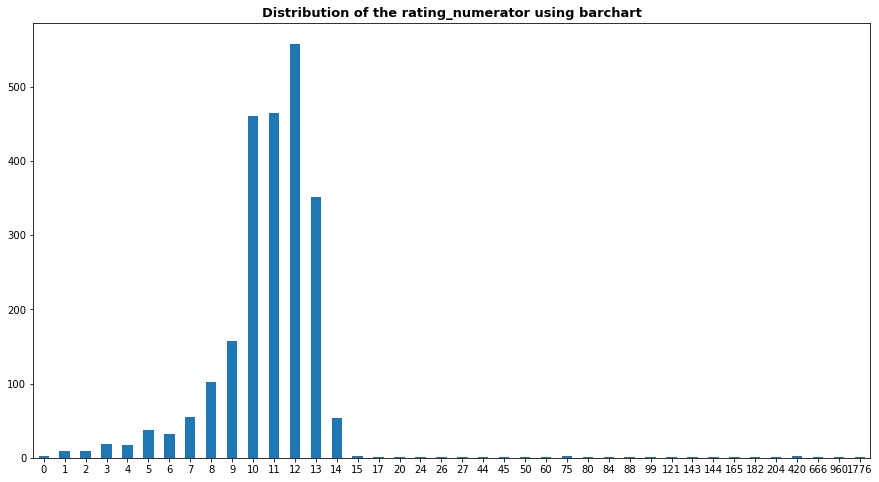

In [26]:
# uding EDA
archive_df['rating_numerator'].value_counts().sort_index().plot(kind = 'bar', figsize = (15,8), rot = 0); # sorting and ploting
plt.title("Distribution of the rating_numerator using barchart", fontsize = 13, fontweight = 'bold');

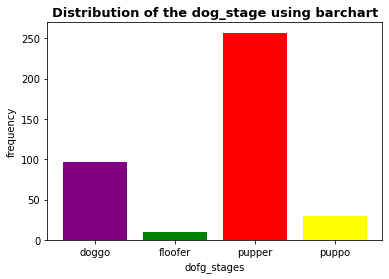

In [27]:
# exploring the distribution of dog stage(non null) over the given datssets
labels = ['doggo', 'floofer','pupper', 'puppo']
x1 = len(archive_df.query('doggo != "None"'))
x2 = len(archive_df.query('floofer != "None"'))
x3 = len(archive_df.query('pupper != "None"'))
x4 = len(archive_df.query('puppo != "None"'))
lists =[x1, x2, x3, x4]
locations = [1, 2 ,3 ,4]
plt.bar(locations, lists, tick_label=labels,  color = ('purple', 'green', 'red', 'yellow'))
plt.title("Distribution of the dog_stage using barchart", fontsize = 13, fontweight = 'bold');
plt.xlabel('dofg_stages')
plt.ylabel('frequency');
plt.show()

In [61]:
archive_df.name.sample(4)

1078     Kyle
1528    Oddie
479      Levi
879      Theo
Name: name, dtype: object

In [69]:
# checking rating_denominator agains the standard value 
archive_df[archive_df['rating_denominator']!= 10].head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,30582082.0,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None


#### Result of the programtic assessment: twitter-archive-enhencement table
Quality
>- name: the value of name column, instead of `a` replace with valid name and should start with capital later
>- in_reply_to_status_id,in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp: these columns are almost null and needs to handled.
> - expanded_urls: this column also contains null values and it is insgnificant for the analysis                  
>- timesatmp: its datatype should be datetime instead of object.
>- tweet_id: its datatype should be object.
>- rating_numenator: rating_numenator with floating value are not correctly extracted
>- some of the vlaue of columns doggo, floofer, pupper, puppo is None instead of NaN, should be replaced
>- rating_denominator: should be standardaized, should be 10
>  the source is invalid data/inaccurate and needs to remove all the unneccessay symbols and texts 
>- the text is invalid/inaccurate and needs remove the special characters and numbers and symbols 

Tidy
>- the columns doggo', 'floofer', 'pupper' and 'puppo' describes dog satge, it needs to be structured! 

### Programmatic assessment: tweet_df table

In [10]:
# checking info
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   favorite_count  2354 non-null   int64
 2   retweet_count   2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [30]:
# checking duplicated records on the extracted dataset
tweet_df.duplicated().sum()

0

In [32]:
# checking number of null value in each column
tweet_df.isnull().sum()

id                0
favorite_count    0
retweet_count     0
dtype: int64

In [33]:
# checking data duplication with specific id
tweet_df[tweet_df['id'].duplicated()]

,id,favorite_count,retweet_count


In [37]:
# skewness 
tweet_df.skew()

id                0.565709
favorite_count    3.724750
retweet_count     5.431535
dtype: float64

In [38]:
# correlation 
tweet_df.corr()

,id,favorite_count,retweet_count
id,1.000000,0.528210,0.389995
favorite_count,0.528210,1.000000,0.702881
retweet_count,0.389995,0.702881,1.000000


In [36]:
tweet_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,2354.0,7.426978e+17,6.852812e+16,6.660209e+17,6.783975e+17,7.194596e+17,7.993058e+17,8.924206e+17
favorite_count,2354.0,8.080969e+03,1.181477e+04,0.000000e+00,1.415000e+03,3.603500e+03,1.012225e+04,1.328100e+05
retweet_count,2354.0,3.164797e+03,5.284770e+03,0.000000e+00,6.245000e+02,1.473500e+03,3.652000e+03,7.951500e+04


In [42]:
print ("the shape of the datafram is ", tweet_df.shape)

the shape of the datafram is  (2354, 3)


#### Result of the programtic assessment: tweet_df table
Quality
>- id : the datatype should be object
>- the id should be replaced with tweet_id for consistency purpose with other datasets

### Programmatic assessment: image-prediction table

In [43]:
# checking information
image_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [44]:
# no duplication of the tweet_id
image_df.tweet_id.duplicated().any()

False

In [45]:
# checking value of P1 repitition in dece order
image_df.p1.value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
pillow                  1
carousel                1
bald_eagle              1
lorikeet                1
orange                  1
Name: p1, Length: 378, dtype: int64

In [46]:
image_df.p1.value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
pillow                  1
carousel                1
bald_eagle              1
lorikeet                1
orange                  1
Name: p1, Length: 378, dtype: int64

In [47]:
# checking value of P2 repitition in dece order
image_df.p2.value_counts()

Labrador_retriever    104
golden_retriever       92
Cardigan               73
Chihuahua              44
Pomeranian             42
                     ... 
medicine_chest          1
quail                   1
horse_cart              1
waffle_iron             1
bagel                   1
Name: p2, Length: 405, dtype: int64

In [48]:
# checking each column agianst null
image_df.isnull().any().sum()

0

In [49]:
#checking records against duplication
image_df.duplicated().any().sum()

0

In [171]:
# checking duplication 
image_df['jpg_url'].duplicated().sum()

66

In [174]:
image_df['tweet_id'].duplicated().sum()

0

In [51]:
print ("the shape of the datafram is ", image_df.shape)

the shape of the datafram is  (2075, 12)


In [172]:
image_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [154]:
#image_df.to_csv('datasets/image-prediction.csv', index = False)

#### Result of the programtic assessment: image-prediction table
Quality
>- tweet_id: its datatype should be string instead of float
>- size of the reocrd should be 2356 instade of 2074
>- the Value in each prediction is inconsistent, some of them satrt with either capital or small letter.   

### Summery of the Assessment
Quality
- **Twitter-archive-enhanced table**
>- missing value in reply_to_status_id
>- missing value in reply_to_user_id
>- missing value in retweeted_status_id 
>- misiing value in retweeted_status_id 
>- missing value in retweeted_status_timestamp
>- missing value in the expanded_url
>- use only original tweets, remove the rows with retweet and replay
>- size of the reocrd in the image prediction should be 2356 instade of 2074
>- timesatmp: its datatype should be datetime instead of object.
>- tweet_id: its datatype should be object.
>- name: the value of name column, instead of `a` replace with valid name and should start with capital later
>- rating_numenator with floating value are not correctly extracted (in correct)
>- the source value is invalid data/inaccurate and needs to remove all the unneccessay symbols and characters 
>- the text value is invalid/inaccurate and needs remove the special characters and numbers and symbols
>- some of the vlaue of columns doggo, floofer, pupper, puppo is None instead of NaN, should be replaced

- **tweet_df table**
>- the id column name should be renamed with tweet_id for consisstency with the other datasets
- **image-predictions table**
>- the Value in each prediction is inconsistent, some of them satrt with either capital or small letter.
>- duplicated jpg_url, duplication should be handled
>- the name of each prediction are not clearly understandable, should be changed

- Tidiness:
>- `archive_df`: the columns doggo', 'floofer', 'pupper', 'puppo' describe dog satge, it needs to be structured 
>- the three tables should be merged to create the master data using the `tweet_id`


 # Step 3: Cleaning Data

In [53]:
# copying the dataframe
clean_archive_df = archive_df.copy()
clean_tweet_df = tweet_df.copy()
clean_imagepre_df = image_df.copy()

In [54]:
import warnings
warnings.filterwarnings('ignore')

# Quality issue

## 1. use only original tweets
- `clean_archive_df`: the retweet and replay are duplicates the actual tweets

#### Define

- The retweet rows should be removed since retweets are essentially duplicates of the actual tweets and so they may skew the result of the analysis.
- remove tweets that are a replay or a retweet from clean_archive_df
 - missing value in reply_to_status_id
 - missing value in reply_to_user_id
 - missing value in retweeted_status_id
 - misiing value in retweeted_status_id
 - retweeted_status_timestamp

#### code 

In [55]:
# Find rows to remove for replies
# They do not have NaNs in 'in_reply_to_status_id'
rep = (~clean_archive_df.in_reply_to_status_id.isnull())

# removing from clean_archive_df
clean_archive_df = clean_archive_df[~rep]

In [56]:
#identify rows to remove for retweets
ret = (~clean_archive_df.retweeted_status_id.isnull())
# And remove them from df_arch_clean
clean_archive_df = clean_archive_df[~ret]

#### Test

In [57]:
clean_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   int64  
 12  name                        2097 non-null   object 
 13  doggo                       2097 

## 2. Missing Data issue 
- `clean_archive_df`:handling missing value 

#### Define
Remove the columns with null values 
- missing value in reply_to_status_id
- missing value in reply_to_user_id
- missing value in retweeted_status_id
- misiing value in retweeted_status_id
- retweeted_status_timestamp

### code
- Uses Drop() method and pandas libraries to do so!

In [58]:
# droping null and insingifican columns
def drop_insgnificant_null():
    # droping from the archive dataframe
    clean_archive_df.drop(['in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_id', 
                                         'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1, inplace=True)

drop_insgnificant_null()

### Test
- Using methods such as, info, head and other to observe correctness of the code. 

In [59]:
# columns are droped
clean_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2097 non-null   int64 
 1   timestamp           2097 non-null   object
 2   source              2097 non-null   object
 3   text                2097 non-null   object
 4   expanded_urls       2094 non-null   object
 5   rating_numerator    2097 non-null   int64 
 6   rating_denominator  2097 non-null   int64 
 7   name                2097 non-null   object
 8   doggo               2097 non-null   object
 9   floofer             2097 non-null   object
 10  pupper              2097 non-null   object
 11  puppo               2097 non-null   object
dtypes: int64(3), object(9)
memory usage: 213.0+ KB


## 3. inaccurate value of `name`

`clean_archive_df`: the value of name column is inaccurate, replace `a` with valid name.

#### Define:
`name`: the value `a` shall be replaced with `NaN` and the None and Nan values shaould be consistent with NaN.

#### Code

In [68]:
# replacing a and None with NaN
clean_archive_df['name'] = clean_archive_df['name'].replace('a', "NaN")
clean_archive_df['name'] = clean_archive_df['name'].replace('None', "NaN")

#### Test

In [69]:
# checking by selection 
clean_archive_df.query('name == "a"')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [70]:
clean_archive_df.name

0        Phineas
1          Tilly
2         Archie
3          Darla
4       Franklin
          ...   
2351         NaN
2352         NaN
2353         NaN
2354         NaN
2355         NaN
Name: name, Length: 2097, dtype: object

## 4.  Rating_numerator    
`clean_archive_df`: rating_numerator with floating values are not correctly extracted from the `text`

#### Define
`rating_numerator` with wrong values should be replaced with correct value extracted from the `text`

#### Coding 
- regular expression and pandas library are important

In [71]:
# extracting the floating values/denomenator and adding to new column called newValue
clean_archive_df['newValue']= clean_archive_df['text'].str.extract(r"([0-9]+[.][0-9]+/[0-9]+)")

In [72]:
# assigning the corrct value
clean_archive_df.rating_numerator = clean_archive_df.rating_numerator.astype(float)
incorrect_numerator_value= list(clean_archive_df[clean_archive_df['newValue'].isnull()==False].index)
for i in incorrect_numerator_value:
    clean_archive_df.rating_numerator[i] = float(clean_archive_df.newValue[i][:-3])

In [73]:
# dropping the new column
clean_archive_df.drop('newValue', axis =1, inplace = True)

#### Test
- checking correctness

In [74]:
# checking 
for i in incorrect_numerator_value:
    print(clean_archive_df.rating_numerator[i])

13.5
9.75
11.27
11.26


In [75]:
# Checking using selection( replaced with the correct value)
clean_archive_df.query('rating_numerator ==9.75')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
695,786709082849828864,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,9.75,10,Logan,None,None,None,None


### 5.  The value of Text and Sources coulumns 
- `clean_archive_df`: the invalid value of `text` and `sources` needs to be corrected

#### Define
- special charcters, URL and inproper numbers shall be removed

#### Code
- Applying regular expression, replace and panda libraries would be helpfull

In [76]:
# cleanining the text
def cleaner(tweet):
    tweet = re.sub("@[A-Za-z0-9]+","",tweet) #Remove @ sign
    tweet = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", tweet) #Remove http links
    tweet = " ".join(tweet.split())
    #tweet = ''.join(c for c in tweet if c not in emoji.emojize) #Remove Emojis
    tweet = tweet.replace("#", "").replace("_", " ").replace("...", "") #Remove hashtag sign but keep the text

#     tweet = " ".join(w for w in nltk.wordpunct_tokenize(tweet) \
#           if w.lower() in words or not w.isalpha())
    return tweet

clean_archive_df['text'] = clean_archive_df['text'].map(lambda x: cleaner(x))


In [77]:
clean_archive_df['text'] = clean_archive_df['text'].str.split(r'.\d+').str[0] # removing the numerator/denomenator

In [78]:
# coding for source
clean_archive_df["source"] = clean_archive_df["source"].str.replace(r"(\s*\<.*?\>\s*)", " ", regex=True).str.strip()

#### Test

In [146]:
# checking for text
print(clean_archive_df['text'].to_markdown())

|      | text                                                                                                                                        |
|-----:|:--------------------------------------------------------------------------------------------------------------------------------------------|
|    0 | This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut.                                                             |
|    1 | This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit.        |
|    2 | This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike.                         |
|    3 | This is Darla. She commenced a snooze mid meal.                                                                                             |
|    4 | This is Franklin. He would like you to stop calling him "cute." He is a very fierce s

In [79]:
# checking for source
clean_archive_df["source"].value_counts()

Twitter for iPhone     1964
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

## 6. inconsistemcy issue
- inconsistency in the value of each prediction, some of them satrt with either capital or small letter
- some of the vlaue of columns doggo, floofer, pupper, puppo is None instead of NaN, should be replaced

#### Define
- capitalization inconsistency in the dog breed should be resolved, all should start with capital letter 
- The consistency in the value of dog stages should be resolved, replace None with NaN

#### Code
- use rename, replace, capitalize methods and pandas library

In [11]:
#clean_imagepre_df['p1']

In [80]:
# the name of each dog breed predicted should start with capital letter/ for consisstency
clean_imagepre_df['p1']= [p.capitalize() for p in clean_imagepre_df['p1']]
clean_imagepre_df['p2']= [p.capitalize() for p in clean_imagepre_df['p2']]
clean_imagepre_df['p3']= [p.capitalize() for p in clean_imagepre_df['p3']]

In [81]:
# Replacing the None with NaN
clean_archive_df['doggo'] = clean_archive_df['doggo'].replace('None', "NaN")
clean_archive_df['floofer'] = clean_archive_df['floofer'].replace('None', "NaN")
clean_archive_df['pupper'] = clean_archive_df['pupper'].replace('None', "NaN")
clean_archive_df['puppo'] = clean_archive_df['puppo'].replace('None', "NaN")

#### Test

In [84]:
# checking predictions, should start with capital letter 
clean_imagepre_df['p1'].head(3)

0    Welsh_springer_spaniel
1                   Redbone
2           German_shepherd
Name: p1, dtype: object

In [83]:
clean_imagepre_df['p2'].head(3) 

0                Collie
1    Miniature_pinscher
2              Malinois
Name: p2, dtype: object

In [85]:
clean_imagepre_df['p3'].head(3) 

0      Shetland_sheepdog
1    Rhodesian_ridgeback
2             Bloodhound
Name: p3, dtype: object

In [86]:
# checking the value of the dog stages
clean_archive_df[clean_archive_df['doggo'] =='None']

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [87]:
clean_archive_df[clean_archive_df['floofer'] =='None']

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


## 7. dupliction issue in image_pred_df table
- duplication in the jpg_url column

#### Define
- each image url ahould be referenced to one image
- the duplicted value should be removed, the first should be retained

#### code 
- use the drop_duplicated method and pandas 

In [88]:
clean_imagepre_df.drop_duplicates(subset=['jpg_url'], keep='first', inplace = True)

#### Test

In [89]:
clean_imagepre_df['jpg_url'].duplicated().sum()

0

## 8. the name of the column id in clean_tweet_df issue
- the name of the id should be similar with th other datasest, the name is different

#### Define 
- The name of the column id should be similar with other datasets for structural purpose, should be renamed as tweet_id

#### Code

In [90]:
# changing the name of the id to tweet_id
clean_tweet_df.rename(columns = {'id':'tweet_id'}, inplace = True)

#### Test

In [91]:
clean_tweet_df.columns

Index(['tweet_id', 'favorite_count', 'retweet_count'], dtype='object')

## 9. invalid datatypes: `tweet_id`, `timestamp`
- `clean_archive_df`, `clean_tweet_df`, `clean_imagepre_df`: the datatype of tweet_id is invalid
- `clean_archive_df`: the datatype of timestamp is invalid

#### Define
- the datatype of the columns should be converted to object instead of int and datetime instead of object respectively.

#### Code
- use to_datetime and astype methods and pandas

In [92]:
# converting to datetime
clean_archive_df['timestamp'] = pd.to_datetime(clean_archive_df['timestamp'])

In [93]:
# converting datatpe to object
clean_archive_df['tweet_id'] = clean_archive_df['tweet_id'].astype(str)
clean_tweet_df['tweet_id'] = clean_tweet_df['tweet_id'].astype(str)
clean_imagepre_df['tweet_id'] = clean_imagepre_df['tweet_id'].astype(str)

#### Test

In [39]:
# tesing using dtype
clean_archive_df[['timestamp', 'tweet_id']].dtypes

timestamp    datetime64[ns, UTC]
tweet_id                  object
dtype: object

In [40]:
clean_imagepre_df['tweet_id'].dtype

dtype('O')

In [41]:
clean_tweet_df['tweet_id'].dtype

dtype('O')

# 10. The column naming issue in clean_imagepre_df table
-  columns pl,p1_conf, p1_dog, P2, p2_dog, p2_conf, P3,p3_conf, p3_dog are ambigious to understood and they are not descriptive.

#### Define
- the columns should be changed to descriptive and understandable to everyone.
- use the guide of Udacity to rename each columns

#### Code
- use rename method and pandas library

In [94]:
# changing the names
clean_imagepre_df.rename(columns={'p1':'first_prediction', 'p1_conf': 'first_confidence', 'p1_dog': 'first_dog',
                                  'p2': 'second_prediction', 'p2_conf': 'second_confidence', 'p2_dog': 'second_dog',
                                  'p3': 'third_prediction', 'p3_conf': 'third_confidence', 'p3_dog': 'third_dog'}, inplace = True)

#### Test

In [96]:
clean_imagepre_df.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'first_prediction',
       'first_confidence', 'first_dog', 'second_prediction',
       'second_confidence', 'second_dog', 'third_prediction',
       'third_confidence', 'third_dog'],
      dtype='object')

# Tidyness issue 

## 1. the coluns in `clean_archive_df` that describes about dog stages
`clean_archive_df`: the columns `doggo`, `floofer`, `pupper` and `puppo` describes dog_satge, it is structural issue.

#### Define
 - Add column dog_stage, assign the values of the doggo, floofer, pupper and puppo to it and drop the columns 

#### Code

In [97]:
# creating dog_stage and assigning the value of columns 
clean_archive_df['dog_stage'] = clean_archive_df.doggo + clean_archive_df.floofer + clean_archive_df.pupper + clean_archive_df.puppo

In [98]:
# droping the columns
clean_archive_df.drop(['doggo', 'floofer',
       'pupper', 'puppo'], axis = 1, inplace = True)

In [99]:
# replacing NaN with space 
clean_archive_df['dog_stage'] = clean_archive_df['dog_stage'].map(lambda x: x.replace("NaN",""))

In [100]:
# correcting the values 
clean_archive_df.loc[clean_archive_df['dog_stage'] == 'doggopuppo', 'dog_stage'] = 'doggo, puppo'
clean_archive_df.loc[clean_archive_df['dog_stage'] == 'doggofloofer', 'dog_stage'] = 'doggo, floofer'
clean_archive_df.loc[clean_archive_df['dog_stage'] == 'doggopupper', 'dog_stage'] = 'doggo, pupper'

#### Test

In [101]:
clean_archive_df.dog_stage.value_counts()

                  1761
pupper             221
doggo               72
puppo               23
floofer              9
doggo, pupper        9
doggo, puppo         1
doggo, floofer       1
Name: dog_stage, dtype: int64

In [102]:
clean_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   object             
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2097 non-null   float64            
 6   rating_denominator  2097 non-null   int64              
 7   name                2097 non-null   object             
 8   dog_stage           2097 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(1), int64(1), object(6)
memory usage: 228.4+ KB


## 2. mergining the three tables
`clean_archive_df`, `clean_tweet_df`, `clean_imagepre_df`: these tables have similar `tweet_id`, it is structural issue

#### Define
- the three tables should be merged to create the master data using the `tweet_id`

#### Code
- Use the merge method and padas library
- combine `clean_archive_df` and `clean_tweet_df` and put into `clean_archive_df`
- combine `clean_archive_df` and `clean_imagepre` and put into `twitter_archive_master.csv`

In [103]:
# combining using merge(), 
clean_archive_df = pd.merge(clean_archive_df, clean_tweet_df, left_on = ['tweet_id'], 
                            right_on = ['tweet_id'], how ="inner")

In [104]:
clean_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2096
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   object             
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2097 non-null   float64            
 6   rating_denominator  2097 non-null   int64              
 7   name                2097 non-null   object             
 8   dog_stage           2097 non-null   object             
 9   favorite_count      2097 non-null   int64              
 10  retweet_count       2097 non-null   int64              
dtypes: datetime64[ns, UTC](1), float64(1), int64(3), object(6)
memory usage: 196.6+ KB


In [105]:
# mergining with image prediction
clean_archive_df = pd.merge(clean_archive_df, clean_imagepre_df, left_on = ['tweet_id'], 
                            right_on = ['tweet_id'], how ="inner")

#### Test

In [106]:
# testing using info and head
clean_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1971 non-null   object             
 1   timestamp           1971 non-null   datetime64[ns, UTC]
 2   source              1971 non-null   object             
 3   text                1971 non-null   object             
 4   expanded_urls       1971 non-null   object             
 5   rating_numerator    1971 non-null   float64            
 6   rating_denominator  1971 non-null   int64              
 7   name                1971 non-null   object             
 8   dog_stage           1971 non-null   object             
 9   favorite_count      1971 non-null   int64              
 10  retweet_count       1971 non-null   int64              
 11  jpg_url             1971 non-null   object             
 12  img_num             1971 non-null 

In [145]:
clean_archive_df.sample(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,favorite_count,...,img_num,first_prediction,first_confidence,first_dog,second_prediction,second_confidence,second_dog,third_prediction,third_confidence,third_dog
1513,675003128568291329,2015-12-10 17:24:21+00:00,Twitter for iPhone,Meet Laela. She's adorable. Magnificent eyes. ...,https://twitter.com/dog_rates/status/675003128...,12.0,10,Laela,,1672,...,1,Pembroke,0.655279,True,Pomeranian,0.104164,True,Cardigan,0.052818,True
1426,677644091929329666,2015-12-18 00:18:36+00:00,Twitter for iPhone,This is a dog swinging. I really enjoyed it so...,https://twitter.com/dog_rates/status/677644091...,11.0,10,NaN,,2040,...,1,Chihuahua,0.626236,True,Italian_greyhound,0.128483,True,Swing,0.059840,False


# Step 4: Storing Data

In [108]:
clean_archive_df.to_csv('Datasets/twitter_archive_master.csv', index = False)

In [110]:
#testing 
df_master = pd.read_csv('Datasets/twitter_archive_master.csv')

### Storing to Database

In [113]:
# create connection
from sqlalchemy import create_engine
engine = create_engine('sqlite:///WeRateDogs.db')

In [114]:
# Store cleaned master DataFrame ('df') in a table called master in bestofrt.db
df_master.to_sql('master', engine, index=False)

1971

# Step 5: Analyzing and Visualizing Data
- in this step at least three insight and one labeled visualization will be identified

In [115]:
df_master = pd.read_csv('datasets/twitter_archive_master.csv')

In [146]:
df_master.sample(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,favorite_count,...,first_prediction,first_confidence,first_dog,second_prediction,second_confidence,second_dog,third_prediction,third_confidence,third_dog,rating numerator
761,745433870967832576,2016-06-22 01:50:58+00:00,Twitter for iPhone,This is Lenox. She's in a wheelbarrow. Silly d...,https://twitter.com/dog_rates/status/745433870...,10.0,10,Lenox,doggo,7824,...,Barrow,0.999962,False,Basset,0.000014,True,Wok,0.000006,False,low
524,782305867769217024,2016-10-01 19:47:08+00:00,Twitter for iPhone,This is Sampson. He just graduated. Ready to b...,https://twitter.com/dog_rates/status/782305867...,12.0,10,Sampson,doggo,18630,...,Briard,0.504427,True,Soft-coated_wheaten_terrier,0.390678,True,Lhasa,0.034596,True,high


## The following question are prepared to identify some of the insight on the given data

### 1. what do look like the distribution of the rating_numerator on the given dataset?

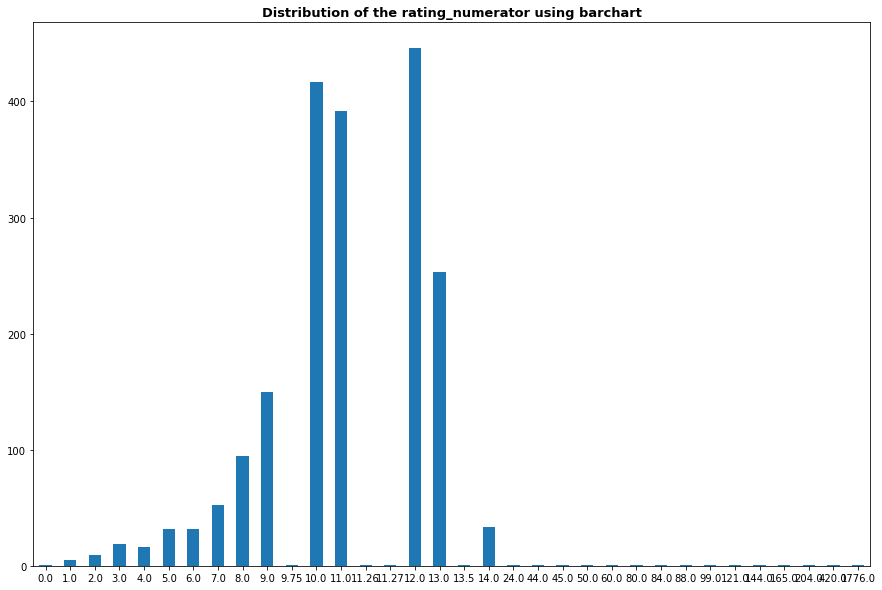

In [117]:
# distribution 
df_master['rating_numerator'].value_counts().sort_index().plot(kind = 'bar', figsize = (15,10), rot = 0); # sorting and ploting
plt.title("Distribution of the rating_numerator using barchart", fontsize = 13, fontweight = 'bold');

### 2.  How does look like the association among the rating_numerator, favorite_count and retweet_count

In [118]:
# filltering would be helpfull to make it more readeble, rating_numerator > 15 seems in significant 
df_filtered_master = df_master[df_master['rating_numerator'] <= 15]

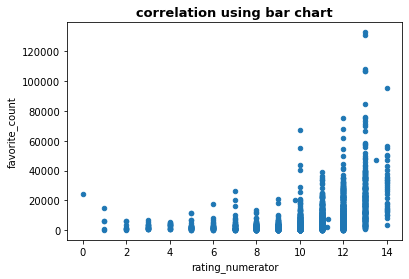

In [119]:
# using scatter plot
df_filtered_master.plot(x='rating_numerator', y='favorite_count',kind='scatter')
plt.title("correlation using bar chart", fontsize = 13, fontweight = 'bold');

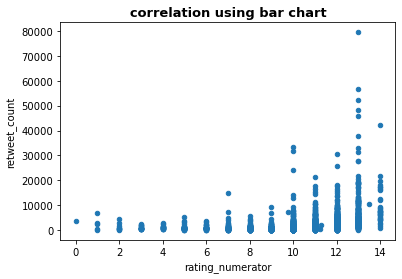

In [120]:
# ploting using scatter plot
df_filtered_master.plot(x='rating_numerator', y='retweet_count',kind='scatter')
plt.title("correlation using bar chart", fontsize = 13, fontweight = 'bold');

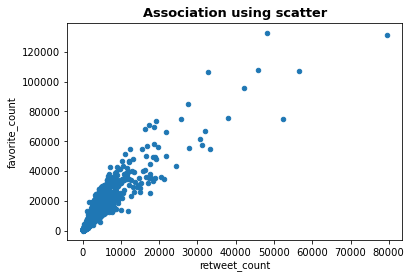

In [121]:
# ploting using line plot
df_filtered_master.plot(x='retweet_count', y='favorite_count',kind='scatter')
plt.title("Association using scatter", fontsize = 13, fontweight = 'bold');

### Other way: measuring their relationship using correlation 

In [122]:
def plot_heatmap(df:pd.DataFrame, title:str, cbar=False)->None:
    plt.figure(figsize=(12, 7))
    sns.heatmap(df, annot=True, cmap='viridis', vmin=0, vmax=1, fmt='.2f', linewidths=.7, cbar=cbar )
    plt.title(title, size=18, fontweight='bold')
    plt.show()

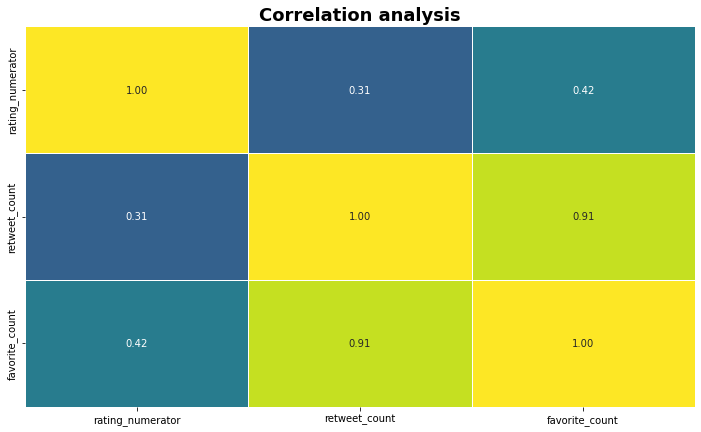

In [123]:
# calculeting correlation
correlation_df = df_filtered_master[['rating_numerator', 'retweet_count', 'favorite_count']]
correlation = correlation_df.corr()
plot_heatmap(correlation, 'Correlation analysis')

### 3. How does the rating_numerator has an impact on dog_satge 

#### for this analysis and foreth, the folowings are droped
- columns: timestamp, source, text, expanded_urls, subjectivity, lang, jpg_url
- rows : rating_numerator greter than 15

In [124]:
# bar plot
def plot_bar(df:pd.DataFrame, x_col:str, y_col:str, title:str, xlabel:str, ylabel:str)->None:
    plt.figure(figsize=(12, 7))
    sns.barplot(data = df, x=x_col, y=y_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.yticks( fontsize=14)
    plt.xlabel(xlabel, fontsize=16)
    plt.ylabel(ylabel, fontsize=16)
    plt.show()

In [125]:
# lests choose the non null dog satges
dog_st = df_master[df_master['dog_stage'].isnull() == False]

In [126]:
 dog_avg=dog_st.groupby('dog_stage')['rating_numerator'].mean()

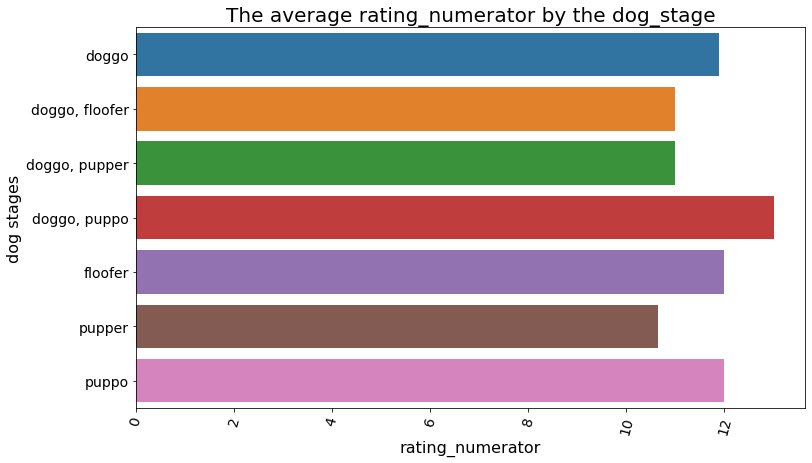

In [127]:
plot_bar(dog_st, dog_avg.values, dog_avg.index, "The average rating_numerator by the dog_stage", 
              "rating_numerator", "dog stages")

In [ ]:
df

### 4. Do the predicted dog breed with higher rating_numenator receive better favorite_count?

In [128]:
def myPlot(df, grpVar, yVar, color = ('purple', 'blue')):
    # df: is the data frame pass from the callee
    # grpVar: is the variable that represent the graph on the x axis
    
    # yvar: the varible that shows its value on the y axis
    # 2. plot, using the groupby with the mean value, it plots on the x axis which is important feature of groupby 
    df.groupby(grpVar)[yVar].mean().plot.bar(edgecolor ='black', figsize =[15,8], rot = 0, width = 0.8, color = color);
    grpVar = grpVar.replace("_", " ") # replacing the _ with space
    yVar = yVar.replace("_ ", " ")  # replacing the _ with space
    # 3. Add title and format
    plt.title(f'Average {yVar} by {grpVar}'.title(), fontsize = 14, weight = 'bold')
    # 4. Adding x lable
    plt.xlabel(grpVar.title(), fontsize = 10, weight = 'bold')
    # 5 Add y label
    plt.ylabel(f'Average {yVar}'.title(), fontsize = 10, weight = 'bold')

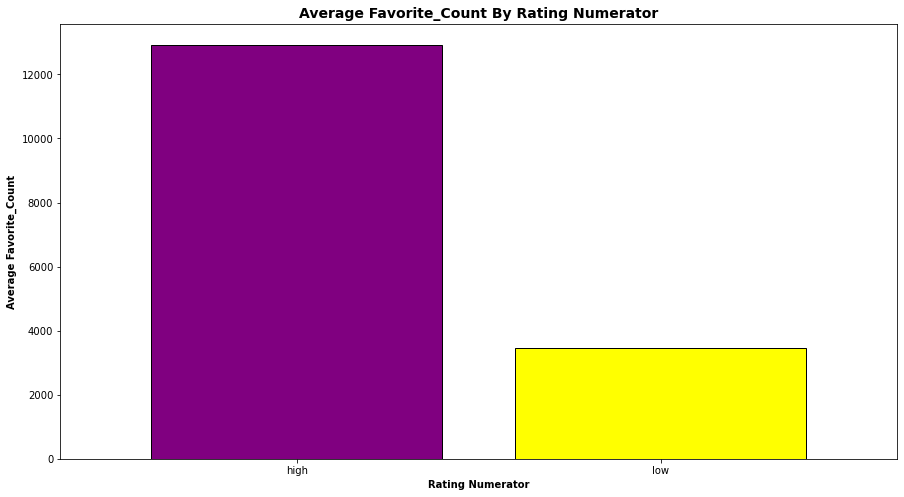

In [129]:
#high = df_pre_rating_favo.query('p1')
df_master['rating numerator'] = 'high'
# 2. change the rows below median to low
df_master.loc[df_master['rating_numerator'] < df_master['rating_numerator'].median(), 'rating numerator'] = 'low'
# call the plot fumction
myPlot(df_master, 'rating numerator', 'favorite_count', color = ('purple', 'yellow'))

### 5. which dog breeds are among the five most having the highest tweets in each prediction?

In [144]:
# lests choose the non null dog satges
df_master= df_master[df_master['dog_stage'].isnull() == False]
df_prediction = df_master[['first_prediction','second_prediction', 'third_prediction']]

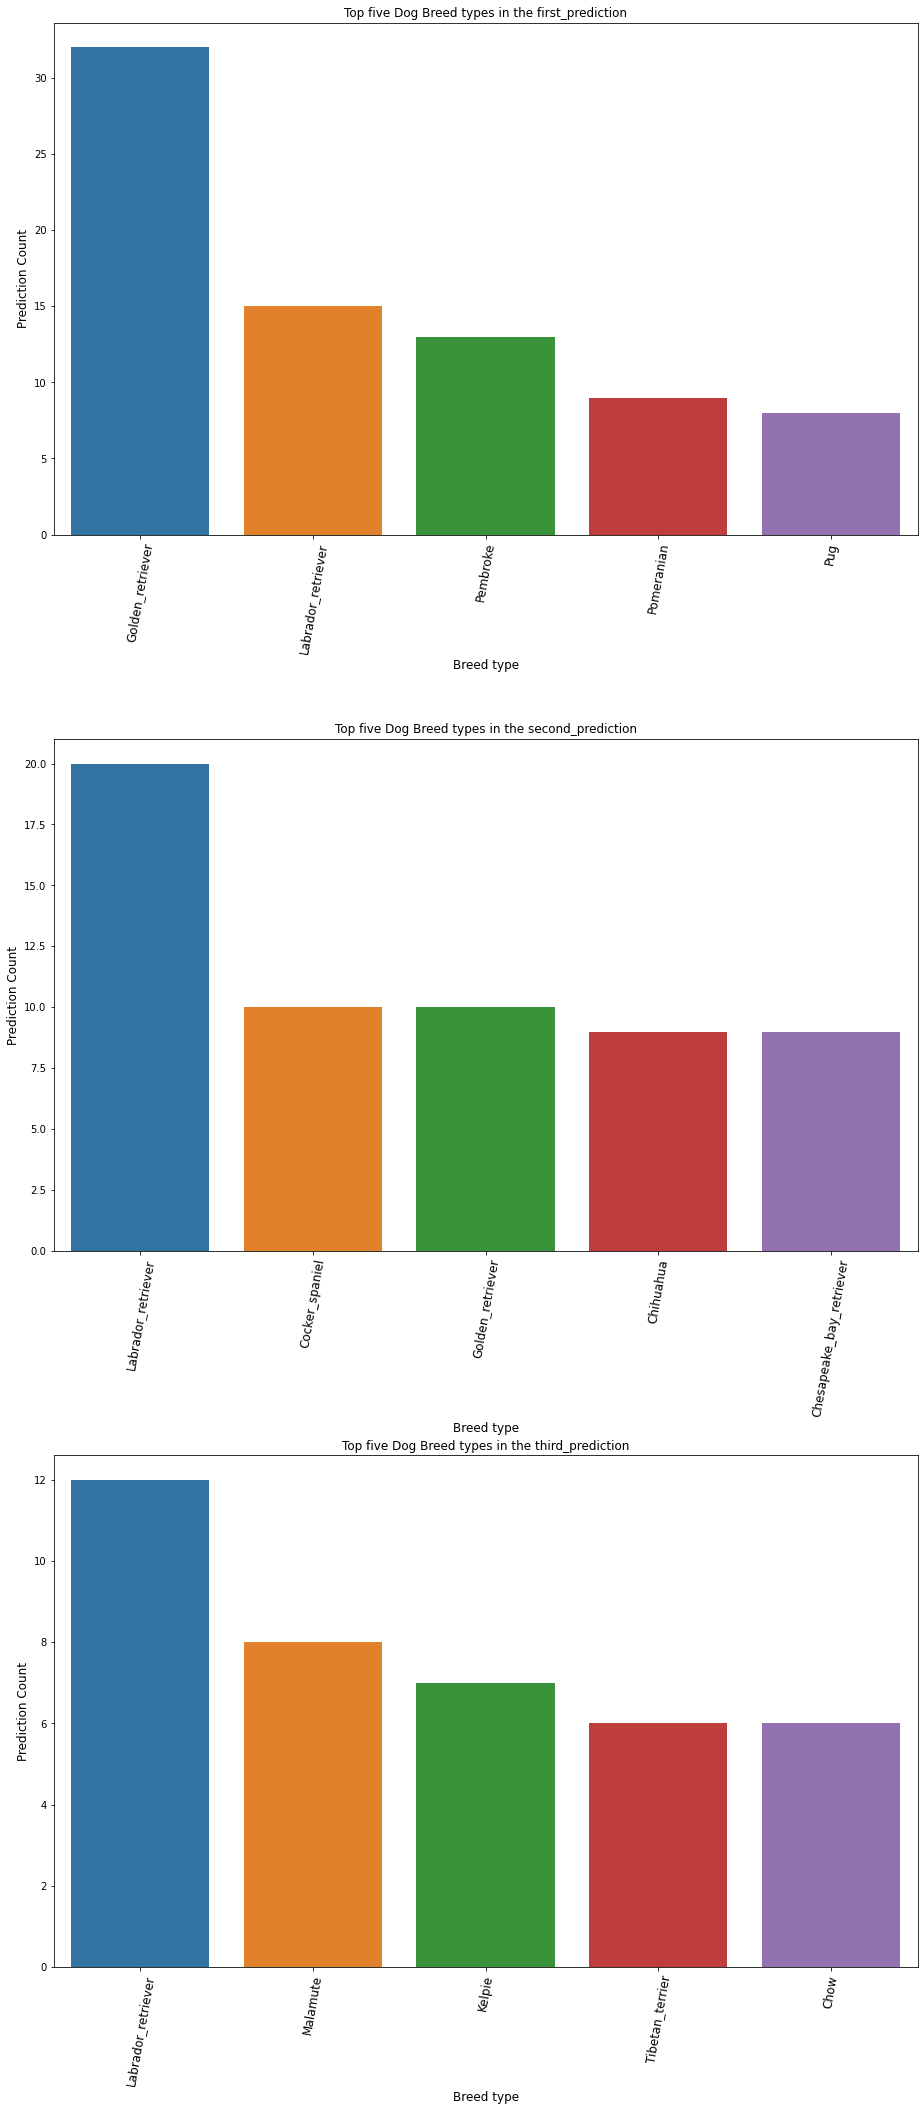

In [131]:
def top_five_predicted(df):
    count=1
    plt.subplots(figsize=(15, 18))
    for pre in df:
        plt.subplot(3,1,count)
        ax = sns.barplot(x = df_master[pre].value_counts()[0:5].index,
            y =df_master[pre].value_counts()[0:5],
            data = df_master);
        ax.set_xticklabels(ax.get_xticklabels(),rotation = 80, fontsize = 12);
        plt.xlabel("Breed type",fontsize = 12);
        plt.ylabel("Prediction Count",fontsize = 12);
        plt.title("Top five Dog Breed types in the "+ pre,fontsize = 12);
        count+=1
        plt.subplots_adjust(left=0.1,
                    bottom=0.0, 
                    right=0.9, 
                    top=1.5, 
                    wspace=0.4, 
                    hspace=0.4)
        #plt.legend(df_master[pre].value_counts()[0:5].index)



top_five_predicted(df_prediction)

### 6. Dog breeds that has maximum and minimum fovorite count in each prediction 


In [132]:
# finding maximum and minimum
favo_max= df_master['favorite_count'].max()
favo_min = df_master['favorite_count'].min()

In [133]:
df_max_favo =df_master.query('favorite_count >= {}'.format(favo_max)) 
df_min_favo =df_master.query('favorite_count <= {}'.format(favo_min)) 

#df_master[pre].value_counts()[

In [134]:
#sort_value.favorite_count
df_max_favo[['favorite_count','first_prediction','second_prediction', 'third_prediction']]

,favorite_count,first_prediction,second_prediction,third_prediction
306,132810,Lakeland_terrier,Labrador_retriever,Irish_terrier


In [135]:
df_min_favo[['favorite_count','first_prediction','second_prediction', 'third_prediction']] 

,favorite_count,first_prediction,second_prediction,third_prediction
1525,693,Pomeranian,Schipperke,Chihuahua


## 7. what are the top 5 breed types in the top 3 rating numerator 

In [ ]:
# identify top 10 bread type
# identify top 3 rating rating numerator

In [136]:
def serious_bar(serious, ax):  
    return sns.barplot(x=serious.index, y=serious, ax=ax)

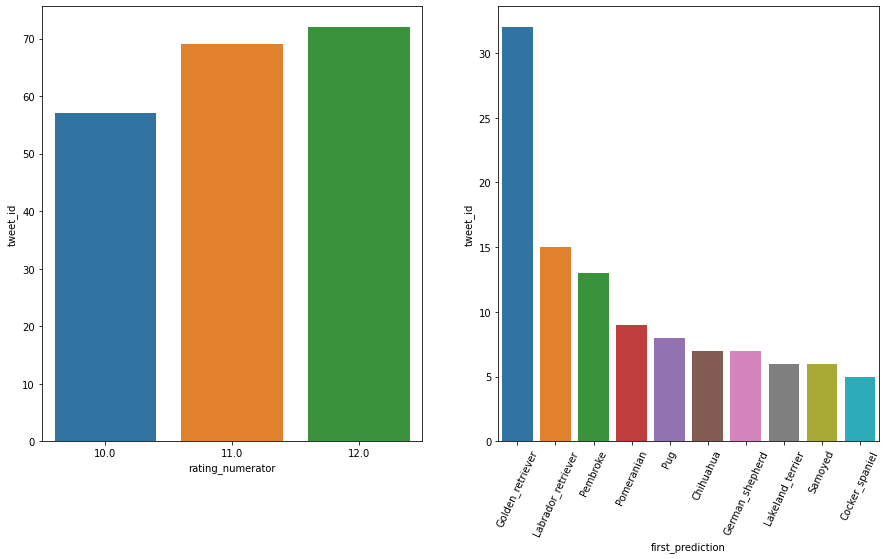

In [137]:
def trys():
    top_10_pre = df_master.groupby("first_prediction")['tweet_id'].nunique().nlargest(10)
    top_3_rating = df_master.groupby("rating_numerator")['tweet_id'].nunique().nlargest(3)

    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,8))
    serious_bar(top_3_rating , ax1)
    
    serious_bar(top_10_pre, ax2)
    plt.xticks(rotation=65)
   # plt.save()
trys()

In [138]:
# identifying top five breeds in the top 3 rating nuerator
top_3_rating = df_master.groupby("rating_numerator")['tweet_id'].nunique().nlargest(3)

In [139]:
top_3_rating

rating_numerator
12.0    72
11.0    69
10.0    57
Name: tweet_id, dtype: int64

In [140]:
# the three rating
rating_11 = df_master.loc[df_master['rating_numerator'] == 11.0, ['first_prediction']].value_counts().nlargest(5)
rating_12 = df_master.loc[df_master['rating_numerator'] == 12.0, ['first_prediction']].value_counts().nlargest(5)
rating_10 = df_master.loc[df_master['rating_numerator'] == 10.0, ['first_prediction']].value_counts().nlargest(5)

In [141]:
# 
rating_11

first_prediction  
Golden_retriever      7
Toy_poodle            4
Labrador_retriever    4
Pomeranian            3
Norwegian_elkhound    2
dtype: int64

In [142]:
#
rating_12

first_prediction  
Golden_retriever      13
Pembroke               6
Labrador_retriever     5
German_shepherd        4
Eskimo_dog             4
dtype: int64

In [143]:
#
rating_10

first_prediction  
Pug                   5
Golden_retriever      3
Labrador_retriever    3
Lakeland_terrier      2
Teddy                 2
dtype: int64